In [1]:
# First install the command

!pip install mlxtend

In [13]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Read the data

df = pd.read_csv("my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [16]:
# first 5 rows

df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [17]:
# last 5 rows

df.tail()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [18]:
# information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [19]:
# Statistical information about the data

df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# no of rows and columns

df.shape

(10, 15)

In [21]:
# Overall dimensions

df.size

150

In [22]:
# Skewness

df.skew()

Sixth Sense     -0.484123
Gladiator       -1.035098
LOTR1            1.778781
Harry Potter1    1.778781
Patriot         -0.484123
LOTR2            1.778781
Harry Potter2    3.162278
LOTR             3.162278
Braveheart       3.162278
Green Mile       1.778781
dtype: float64

In [23]:
# Kurtosis

df.kurt()

Sixth Sense      -2.276786
Gladiator        -1.224490
LOTR1             1.406250
Harry Potter1     1.406250
Patriot          -2.276786
LOTR2             1.406250
Harry Potter2    10.000000
LOTR             10.000000
Braveheart       10.000000
Green Mile        1.406250
dtype: float64

In [24]:
# Correlation

df.corr()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


In [28]:
df.iloc[:,5:]


,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


Apriori Algorithm


## Association Rules with 10% support and 70% Confidence

In [31]:
frequent_itemsets_df=apriori(df1,min_support=0.1,use_colnames=True)
frequent_itemsets_df


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [32]:
rules_df=association_rules(frequent_itemsets_df,metric="confidence",min_threshold=0.70)
rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
...,...,...,...,...,...,...,...,...,...,...
124,"(LOTR1, Harry Potter1)","(Green Mile, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
125,"(Sixth Sense, LOTR2)","(Green Mile, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
126,"(Sixth Sense, LOTR1)","(Green Mile, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
127,"(Green Mile, LOTR2)","(Sixth Sense, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000


In [33]:
rules_df.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
128,"(Green Mile, LOTR1)","(Sixth Sense, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
92,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
103,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
101,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
55,"(Gladiator, Sixth Sense, Green Mile)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
56,"(Green Mile, LOTR, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,0.333333
13,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000


In [34]:
rules_df[rules_df.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
...,...,...,...,...,...,...,...,...,...,...
124,"(LOTR1, Harry Potter1)","(Green Mile, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
125,"(Sixth Sense, LOTR2)","(Green Mile, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
126,"(Sixth Sense, LOTR1)","(Green Mile, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
127,"(Green Mile, LOTR2)","(Sixth Sense, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000


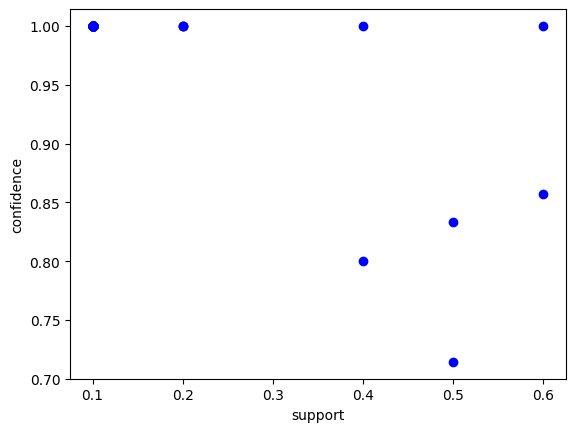

In [37]:
# Visualisation

plt.scatter(rules_df["support"],rules_df["confidence"],color = "blue")
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()


# Association Rules with 20% Support and 80% Confidence




In [38]:
frequent_itemsets_df=apriori(df1,min_support=0.2,use_colnames=True)
frequent_itemsets_df


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [39]:
rules_df=association_rules(frequent_itemsets_df,metric="confidence",min_threshold=0.80)
rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.40
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.50
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50


In [40]:
rules_df.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.50
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.40


In [41]:
rules_df[rules_df.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.40
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.50
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.00
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.75
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.00
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50


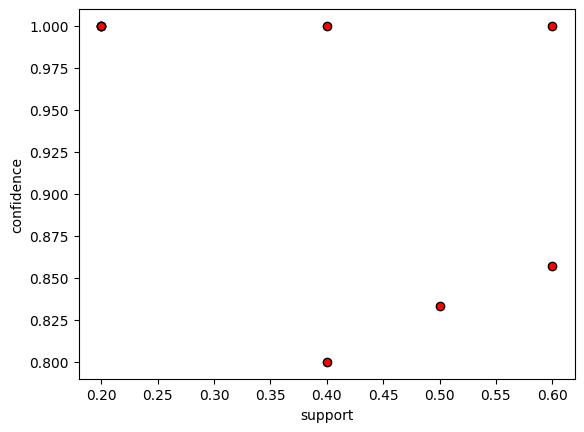

In [43]:
# Visualisation

plt.scatter(rules_df["support"],rules_df["confidence"],color="red",edgecolor="black")
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()

## ***Association Rules with 10% Support and lift 1.4***


In [44]:
frequent_itemsets_df1=apriori(df1,min_support=0.2,use_colnames=True)
frequent_itemsets_df1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Green Mile, Sixth Sense)"


In [45]:
rules_df1=association_rules(frequent_itemsets_df1,metric="lift",min_threshold=1.3)
rules_df1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500
1,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500
8,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000
9,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625


In [46]:
rules_df1.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500
1,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500
8,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500
9,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625


In [47]:
rules_df1[rules_df1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500
1,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750
4,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000
6,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500
7,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500
8,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000
9,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625


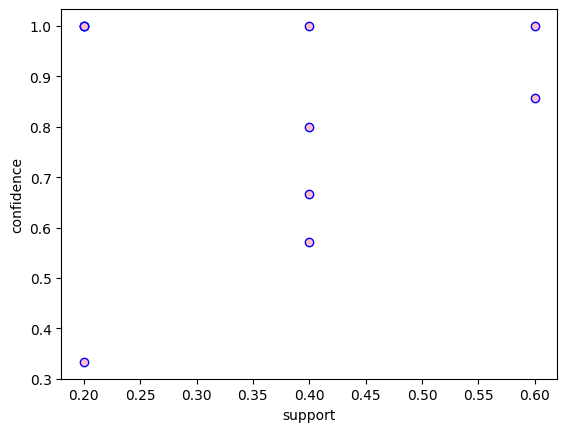

In [53]:
# Visualisation

plt.scatter(rules_df1["support"],rules_df1["confidence"],color = "pink",edgecolor = "blue")
plt.xlabel("support")
plt.ylabel("confidence")
plt.show()